In [30]:
#Importing Data Manipulation Libraries
import numpy as np
import pandas as pd
#Importing Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
# Importing Warnings
import warnings 
warnings.filterwarnings('ignore')
#Importing Scikit-Learn Library
from sklearn.preprocessing import MinMaxScaler,RobustScaler,StandardScaler
from sklearn.model_selection import train_test_split;
#Importing Metrics for Regression Model
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.metrics import confusion_matrix
#Importing Logging
import logging
logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s - %(levelname)s - %(message)s',
                    filemode='w',
                    filename='model.log',force=True)


In [31]:
url = 'https://raw.githubusercontent.com/meet-vasita/Telemarketing_Classification_Model/refs/heads/main/Dataset/BankData.csv'

df = pd.read_csv(url,sep=';')
df.sample(frac=1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
2979,56,technician,married,secondary,no,359,yes,no,unknown,6,jun,220,4,-1,0,unknown,no
3327,36,management,married,primary,no,3953,yes,no,cellular,19,nov,277,1,-1,0,unknown,no
2481,30,management,married,tertiary,no,931,no,no,cellular,17,jul,1183,1,-1,0,unknown,no
87,35,blue-collar,single,primary,no,293,yes,no,unknown,30,may,521,2,-1,0,unknown,no
2370,37,technician,single,secondary,no,-242,yes,no,cellular,13,aug,1149,6,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3244,51,management,married,unknown,no,712,no,no,cellular,13,aug,287,2,-1,0,unknown,no
4066,36,services,married,secondary,no,3064,yes,no,telephone,26,aug,240,3,107,4,failure,no
1032,46,management,single,primary,no,538,no,no,unknown,17,jun,118,3,-1,0,unknown,no
2935,38,services,married,secondary,no,435,yes,no,unknown,23,may,193,2,-1,0,unknown,no


In [32]:
logging.info('Importing the dataset for model building')

In [33]:
df.shape

(4521, 17)

In [34]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [36]:
#Evaluate Descriptive Stats: EDA

#Step 1: Segregate Categorical Columns and Numerical Columns

categorical_num = df.select_dtypes(include=object)
numerical_num = df.select_dtypes(include=['int64','float64'])  

In [37]:
#Step2 : Evaluate Descriptive Stats

from collections import OrderedDict

stats = []

for i in numerical_num.columns:
    categorical_stats = OrderedDict({
        'Feature':i,
        'Mean':df[i].mean(),
        'Medain':df[i].median(),
        'Mode':df[i].mode()[0],
        'Q1':df[i].quantile(0.25),
        'Q3':df[i].quantile(0.75),
        'IQR':df[i].quantile(0.75) - df[i].quantile(0.25),
        'Standard Deviation':df[i].std(),
        'Skewness':df[i].skew(),  
        'Kurtosis':df[i].kurt(),
        'Max':df[i].max(),
        'Min':df[i].min(),
        'Variance':df[i].var()
    })
    stats.append(categorical_stats)
    report = pd.DataFrame(stats)

report

,Feature,Mean,Medain,Mode,Q1,Q3,IQR,Standard Deviation,Skewness,Kurtosis,Max,Min,Variance
0,age,41.170095,39.0,34,33.0,49.0,16.0,10.576211,0.699501,0.348775,87,19,1.118562e+02
1,balance,1422.657819,444.0,0,69.0,1480.0,1411.0,3009.638142,6.596431,88.390332,71188,-3313,9.057922e+06
2,day,15.915284,16.0,20,9.0,21.0,12.0,8.247667,0.094627,-1.039531,31,1,6.802402e+01
3,duration,263.961292,185.0,123,104.0,329.0,225.0,259.856633,2.772420,12.530050,3025,4,6.752547e+04
4,campaign,2.793630,2.0,1,1.0,3.0,2.0,3.109807,4.743914,37.168920,50,1,9.670897e+00
5,pdays,39.766645,-1.0,-1,-1.0,-1.0,0.0,100.121124,2.717071,7.957128,871,-1,1.002424e+04
6,previous,0.542579,0.0,0,0.0,0.0,0.0,1.693562,5.875259,51.995212,25,0,2.868153e+00


In [38]:
#Classification Problems uses Logistic Regression and it Always use Sigmoid Function
# if IQR is 0 then drop that columns 

In [39]:
'''
The dataset consists of 4521 rows and 17 columns. this dataset belongs to the portugal bank where our aim is to classify
where our aim is to to classify whether the customer will subscribe the bank term deposit or not.

Type of machine learning model: Binary Classification

Above Dataset is a type of multivariate analysis.

X: Independent Columns
y: Target Columns / Dependent Columns

Here, 'y' acts as Target Column / Dependent Column.
'''

#Checking the Distribution of people who subscribe the term deposit
#Based on the distribution of target column, we found that the data is imbalanced.

"\nThe dataset consists of 4521 rows and 17 columns. this dataset belongs to the portugal bank where our aim is to classify\nwhere our aim is to to classify whether the customer will subscribe the bank term deposit or not.\n\nType of machine learning model: Binary Classification\n\nAbove Dataset is a type of multivariate analysis.\n\nX: Independent Columns\ny: Target Columns / Dependent Columns\n\nHere, 'y' acts as Target Column / Dependent Column.\n"

<Axes: ylabel='count'>

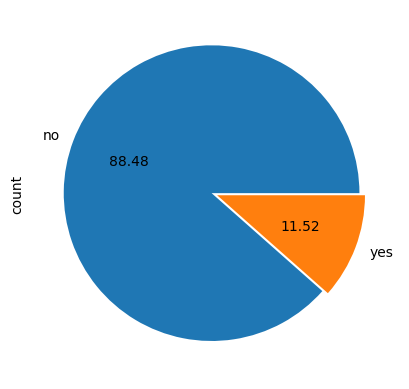

In [40]:
df['y'].value_counts().plot(kind='pie',autopct='%1.2f',explode=[0.02,0.02])

Text(0.5, 1.0, 'Call Duration Records in Seconds vs Months')

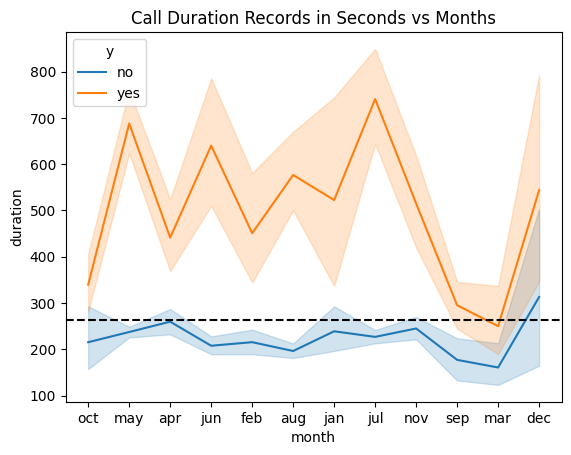

In [45]:
sns.lineplot(x=df['month'],y=df['duration'],hue=df['y'])
plt.axhline(df['duration'].mean(),linestyle='--',color = 'black')
plt.title('Call Duration Records in Seconds vs Months')

Text(0.5, 1.0, 'Call Duration Records in Seconds vs Months')

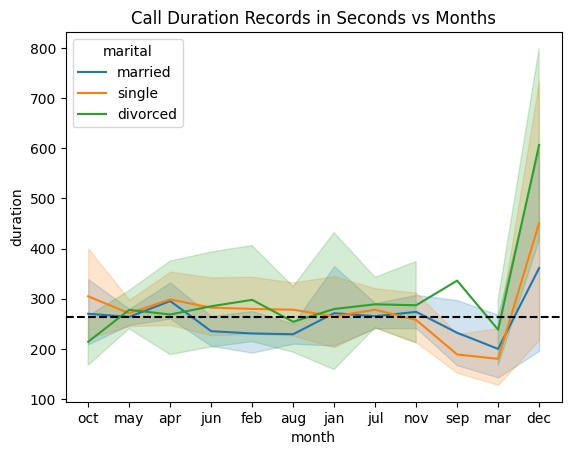

In [47]:
sns.lineplot(x=df['month'],y=df['duration'],hue=df['marital'])
plt.axhline(df['duration'].mean(),linestyle='--',color = 'black')
plt.title('Call Duration Records in Seconds vs Months')

Text(0.5, 1.0, 'Call Duration Records in Seconds vs Months')

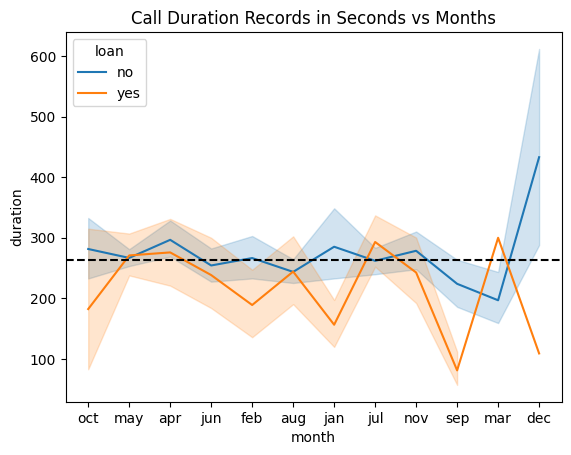

In [49]:
sns.lineplot(x=df['month'],y=df['duration'],hue=df['loan'])
plt.axhline(df['duration'].mean(),linestyle='--',color = 'black')
plt.title('Call Duration Records in Seconds vs Months')

Text(0.5, 1.0, 'Call Duration Records in Seconds vs Months')

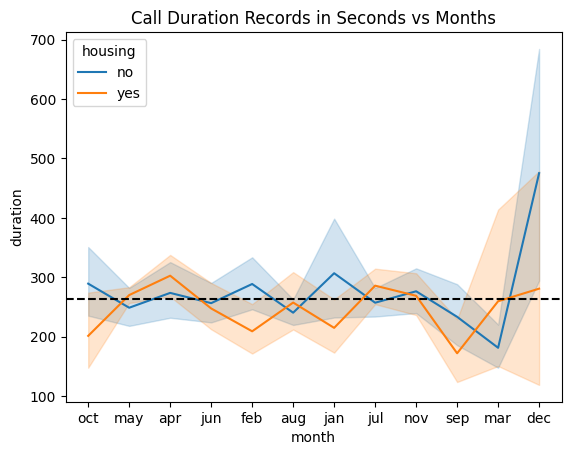

In [51]:
sns.lineplot(x=df['month'],y=df['duration'],hue=df['housing'])
plt.axhline(df['duration'].mean(),linestyle='--',color = 'black')
plt.title('Call Duration Records in Seconds vs Months')

<Axes: ylabel='count'>

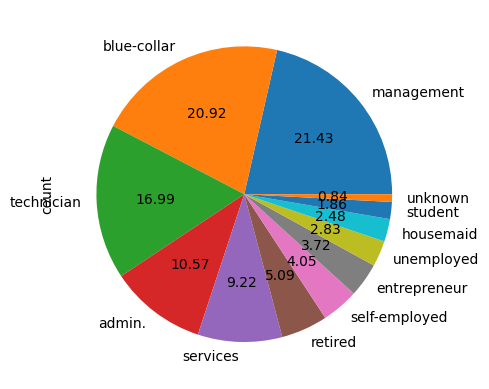

In [54]:
df['job'].value_counts().plot(kind='pie',autopct='%1.2f')

In [ ]:
#Data Insights

'''
1. 88.48% people are not subscribed bank term deposit.
2. The Average Call Duration Recorded 264 seconds. This can be one of the cause for the people who haven't subscribed the bank term deposit.
3. If the call duration more than 300 seconds the chances are that person will subscribe the bank term deposit.
4. The Target audiance is Divorced Peoples.
5. The Person Who Took the loan are excluded from bank term deposit subscription.
6. The Persom Who Took the housing loan also excluded from bank term deposit subscription.
'''

"\n1. 88.48% people are not subscribed bank term deposit.\n2. The Average Call Duration Recorded 264 seconds. This can be one of the cause for the people who haven't subscribed the bank term deposit.\n3. If the call duration more than 300 seconds the chances are that person will subscribe the bank term deposit.\n4. The Target audiance is Divorced Peoples.\n5. The Person Who Took the loan are excluded from bank term deposit subscription.\n"

In [56]:
management = df[df['job'] == 'management']
bluecollar = df[df['job'] == 'blue-collar']

<Axes: ylabel='count'>

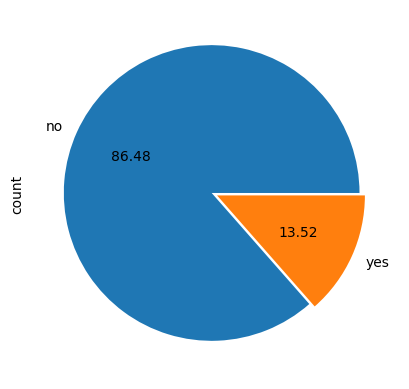

In [65]:
management['y'].value_counts().plot(kind='pie',autopct='%1.2f',explode=[0.02,0.02])

<Axes: xlabel='balance'>

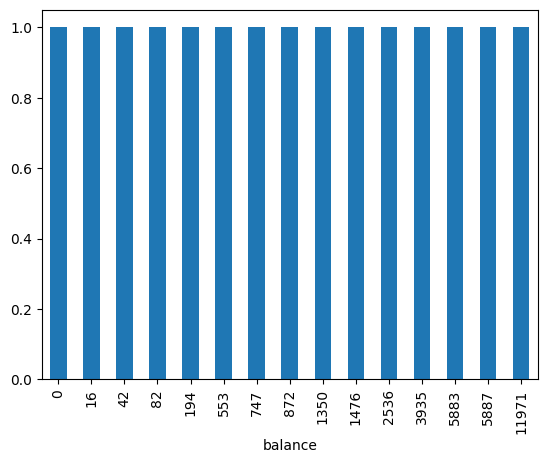

In [68]:
management['balance'][:15].sort_values(ascending=True).value_counts().plot(kind='bar')

Text(0.5, 1.0, 'Call Duration Records in Seconds vs Months')

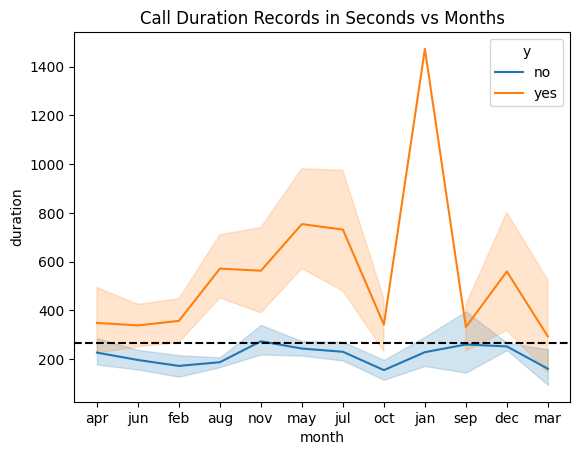

In [77]:
sns.lineplot(x=management['month'],y=management['duration'],hue=management['y'])
plt.axhline(264,linestyle='--',color = 'black')
plt.title('Call Duration Records in Seconds vs Months')

In [ ]:
management['duration']

2        185
3        199
5        141
15       189
20        96
        ... 
4484     663
4489     131
4495    1476
4498     676
4501      63
Name: duration, Length: 969, dtype: int64